In [1]:
# this notebook will show slope area comparisons for a case where sed has same abrasion properties as bedrock 
# (default case)
# versus a case in which sediment is harder than bedrock
# (hard sed nb)

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define domain area
dx = 500
x = np.arange(0, 50000, dx)
area = (1./3.) * x**2

In [4]:
# import slopes
slope_default = np.genfromtxt('slope_default.csv', delimiter=',')
slope_hard_sed = np.genfromtxt('slope_hard_sed.csv', delimiter=',')
slope_soft_sed = np.genfromtxt('slope_soft_sed.csv', delimiter=',')

In [5]:
# repeatable workflow for figure-making
#--------------------------------------

# DEFAULT
m_default, b_default = np.polyfit(np.log(area[1:]), np.log(slope_default), 1)
slope_fit_default = np.exp((m_default * np.log(area[1:])) + b_default)

upper_bound_total_m_default = m_default + 0.05
lower_bound_total_m_default = m_default - 0.05

upper_bound_total_slope_fit_default = np.exp((upper_bound_total_m_default * np.log(area[1:])) + b_default)
lower_bound_total_slope_fit_default = np.exp((lower_bound_total_m_default * np.log(area[1:])) + b_default)
#---------------------------------------------------------------------------------

# HARD SED
m_hard_sed, b_hard_sed = np.polyfit(np.log(area[1:]), np.log(slope_hard_sed), 1)
slope_fit_hard_sed = np.exp((m_hard_sed * np.log(area[1:])) + b_hard_sed)

upper_bound_total_m_hard_sed = m_hard_sed + 0.05
lower_bound_total_m_hard_sed = m_hard_sed - 0.05

upper_bound_total_slope_fit_hard_sed = np.exp((upper_bound_total_m_hard_sed * np.log(area[1:])) + b_hard_sed)
lower_bound_total_slope_fit_hard_sed = np.exp((lower_bound_total_m_hard_sed * np.log(area[1:])) + b_hard_sed)
#---------------------------------------------------------------------------------

# SOFT SED
m_soft_sed, b_soft_sed = np.polyfit(np.log(area[1:]), np.log(slope_soft_sed), 1)
slope_fit_soft_sed = np.exp((m_soft_sed * np.log(area[1:])) + b_soft_sed)

upper_bound_total_m_soft_sed = m_soft_sed + 0.05
lower_bound_total_m_soft_sed = m_soft_sed - 0.05

upper_bound_total_slope_fit_soft_sed = np.exp((upper_bound_total_m_soft_sed * np.log(area[1:])) + b_soft_sed)
lower_bound_total_slope_fit_soft_sed = np.exp((lower_bound_total_m_soft_sed * np.log(area[1:])) + b_soft_sed)
#---------------------------------------------------------------------------------

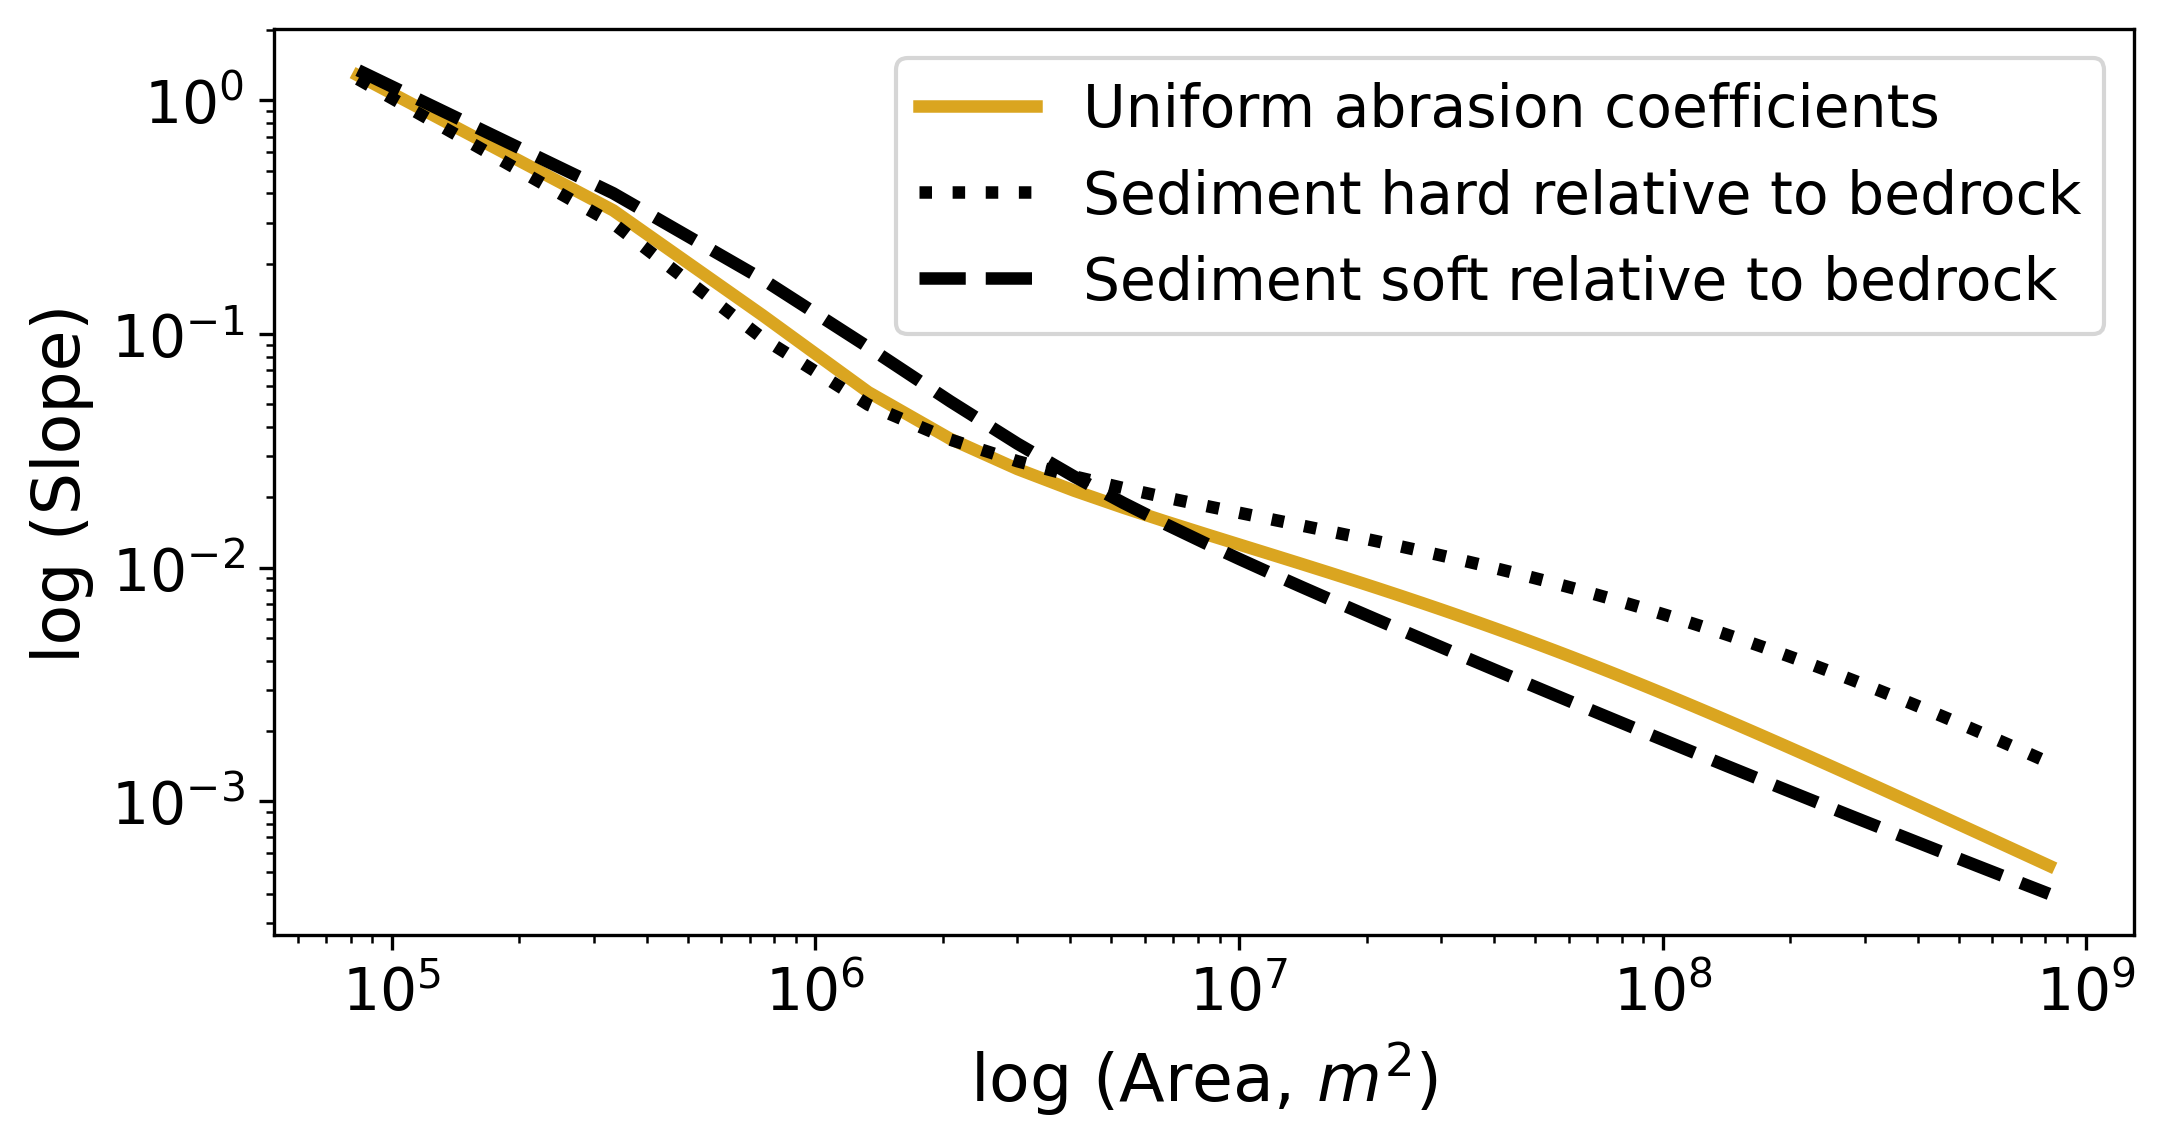

In [6]:
plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300

plt.figure(figsize = (8, 4))

plt.plot(area[1:], slope_default, label = 'Uniform abrasion coefficients', color = 'goldenrod', linewidth = 3)
plt.plot(area[1:], slope_hard_sed, label = 'Sediment hard relative to bedrock', color = 'k', linewidth = 3, linestyle = ':')
plt.plot(area[1:], slope_soft_sed, label = 'Sediment soft relative to bedrock', color = 'k', linewidth = 3, linestyle = "--")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log (Area, $m^2$)', fontsize = 16)
plt.ylabel('log (Slope)', fontsize = 16)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('sed_hardness 2.pdf', bbox_inches='tight')